In [11]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

import torch

tkwargs = {"dtype": torch.double, # set as double to minimize zero error for cholesky decomposition error
           "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu")} # set tensors to GPU, if multiple GPUs please set cuda:x properly

torch.set_printoptions(precision=3)

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# this is for the colorbar, you can change the cmap if you prefer other colour schemes
from matplotlib.cm import ScalarMappable
cm = plt.cm.get_cmap('viridis')

# function to return the std dev across runs
def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)

from matplotlib.ticker import FormatStrFormatter

C:\Users\user\AppData\Local\Temp\ipykernel_38476\3811991979.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis')


In [2]:
from pymoo.factory import get_problem
from botorch.utils.multi_objective.hypervolume import Hypervolume

ref_point = torch.tensor([11,11], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation

problem = get_problem("zdt1")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of {volume}")

problem = get_problem("zdt2")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of {volume}")

problem = get_problem("zdt3")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of {volume}")

ref_point = torch.tensor([1.2,1.2], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation
problem = get_problem("mw7")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of {volume}")

C:\Users\user\AppData\Local\Temp\ipykernel_38476\188916029.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt1")
C:\Users\user\AppData\Local\Temp\ipykernel_38476\188916029.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt2")
C:\Users\user\AppData\Local\Temp\ipykernel_38476\188916029.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt3")
C:\Users\user\AppData\Local\Temp\ipykernel_38476\188916029.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("mw7")


Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of 120.66140936892067
Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of 120.32829983335034
Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of 128.77549696900383
Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of 0.5039622081235824


In [3]:
problem = "ZDT1"
max_hv = 120.66140936892067

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_ZDT1_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT1_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT1_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT1_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_ZDT1_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT1_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT1_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_ZDT1_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [4]:
problem = "ZDT2"
max_hv = 120.32829983335034

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_ZDT2_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT2_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT2_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT2_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_ZDT2_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT2_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT2_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_ZDT2_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [5]:
problem = "ZDT3"
max_hv = 128.77549696900383

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_ZDT3_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT3_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT3_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT3_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_ZDT3_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT3_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT3_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_ZDT3_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [6]:
problem = "MW7"
max_hv = 0.5039622081235824

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_MW7_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_MW7_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_MW7_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_MW7_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_MW7_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_MW7_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_MW7_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_MW7_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [7]:
problem = "concrete"
max_hv = 1.3651840855899149

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_concrete_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_concrete_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_concrete_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_concrete_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_concrete_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_concrete_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_concrete_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_concrete_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [8]:
problem = "thinfilm"
max_hv = 0.5473494765716818

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_noise1.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_noise2.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_noise3.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_noise4.csv", delimiter=',')

hv_nsga3_plot_thinfilm_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_thinfilm_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_thinfilm_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_thinfilm_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_noise1.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_noise2.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_noise3.csv", delimiter=',')
hvs_qnehvi_all3 = loadtxt(f"{problem}_hvs_qnehvi_noise4.csv", delimiter=',')

hv_qnehvi_plot_thinfilm_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_thinfilm_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_thinfilm_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 
hv_qnehvi_plot_thinfilm_3 = np.log10(max_hv - np.asarray(hvs_qnehvi_all3)) 

In [9]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

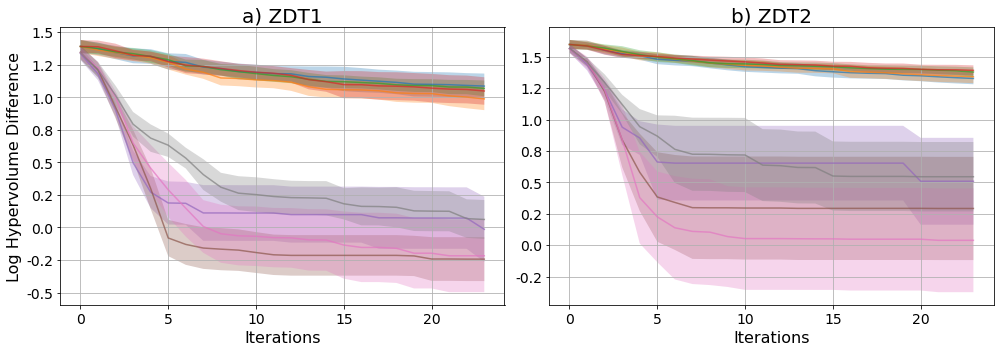

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

noiselist = [1, 2.5, 5, 10]

nsga3list = [hv_nsga3_plot_ZDT1_0,hv_nsga3_plot_ZDT1_1,hv_nsga3_plot_ZDT1_2,hv_nsga3_plot_ZDT1_3]
qnehvilist = [hv_qnehvi_plot_ZDT1_0, hv_qnehvi_plot_ZDT1_1, hv_qnehvi_plot_ZDT1_2, hv_qnehvi_plot_ZDT1_3]
i=0

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"a) ZDT1", fontsize=20)
    
nsga3list = [hv_nsga3_plot_ZDT2_0,hv_nsga3_plot_ZDT2_1,hv_nsga3_plot_ZDT2_2,hv_nsga3_plot_ZDT2_3]
qnehvilist = [hv_qnehvi_plot_ZDT2_0, hv_qnehvi_plot_ZDT2_1, hv_qnehvi_plot_ZDT2_2, hv_qnehvi_plot_ZDT2_3]
i=1

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"b) ZDT2", fontsize=20)

ax[0].set(ylabel='Log Hypervolume Difference')

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[0].locator_params(axis='y', nbins=10)

ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[1].locator_params(axis='y', nbins=10)

fig.tight_layout()

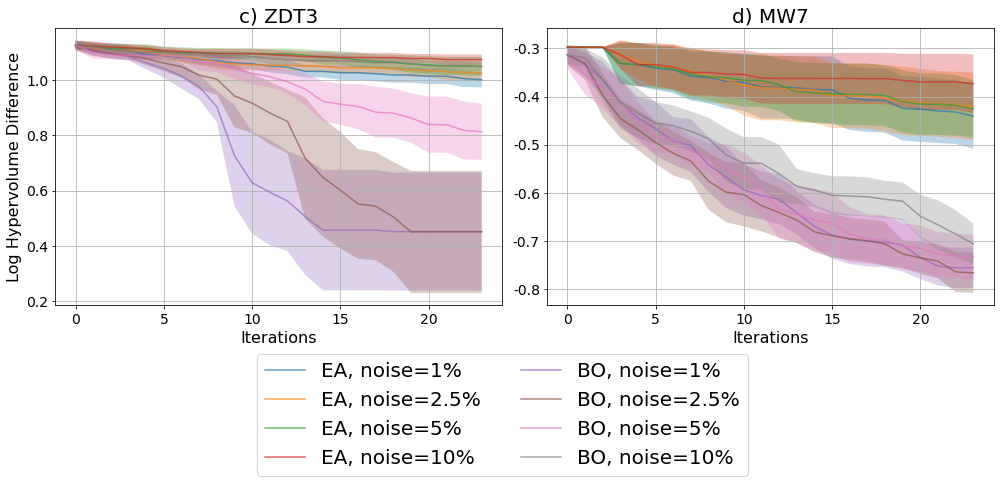

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

noiselist = [1, 2.5, 5, 10]

nsga3list = [hv_nsga3_plot_ZDT3_0,hv_nsga3_plot_ZDT3_1,hv_nsga3_plot_ZDT3_2,hv_nsga3_plot_ZDT3_3]
qnehvilist = [hv_qnehvi_plot_ZDT3_0, hv_qnehvi_plot_ZDT3_1, hv_qnehvi_plot_ZDT3_2, hv_qnehvi_plot_ZDT3_3]
i=0

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"c) ZDT3", fontsize=20)
    
nsga3list = [hv_nsga3_plot_MW7_0,hv_nsga3_plot_MW7_1,hv_nsga3_plot_MW7_2,hv_nsga3_plot_MW7_3]
qnehvilist = [hv_qnehvi_plot_MW7_0, hv_qnehvi_plot_MW7_1, hv_qnehvi_plot_MW7_2, hv_qnehvi_plot_MW7_3]
i=1

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"d) MW7", fontsize=20)


ax[0].set(ylabel='Log Hypervolume Difference')

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[0].locator_params(axis='y', nbins=10)

ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[1].locator_params(axis='y', nbins=10)


fig.tight_layout()

plt.legend(bbox_to_anchor=(-0.1,-0.65), loc="lower center", ncol=2, fontsize=20)

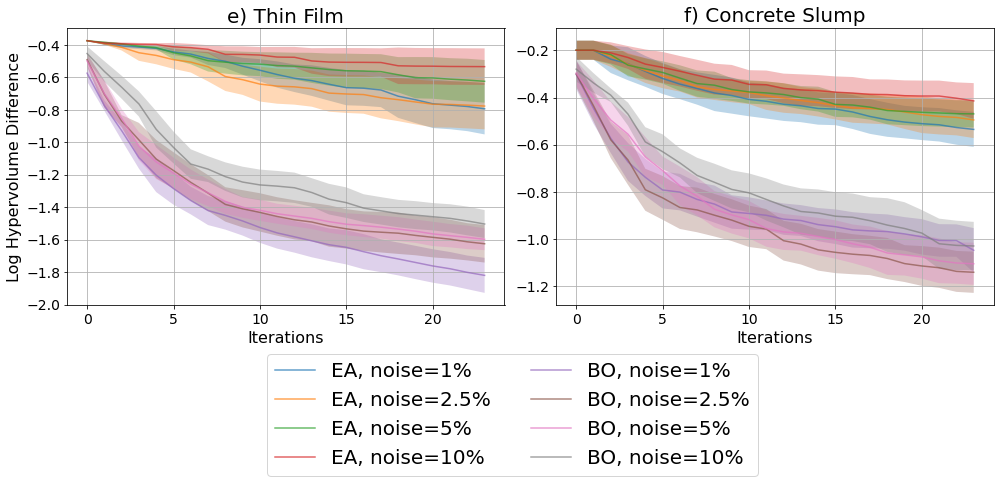

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

noiselist = [1, 2.5, 5, 10]

nsga3list = [hv_nsga3_plot_thinfilm_0,hv_nsga3_plot_thinfilm_1,hv_nsga3_plot_thinfilm_2,hv_nsga3_plot_thinfilm_3]
qnehvilist = [hv_qnehvi_plot_thinfilm_0, hv_qnehvi_plot_thinfilm_1, hv_qnehvi_plot_thinfilm_2, hv_qnehvi_plot_thinfilm_3]
i=0

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"e) Thin Film", fontsize=20)
    
nsga3list = [hv_nsga3_plot_concrete_0,hv_nsga3_plot_concrete_1,hv_nsga3_plot_concrete_2,hv_nsga3_plot_concrete_3]
qnehvilist = [hv_qnehvi_plot_concrete_0, hv_qnehvi_plot_concrete_1, hv_qnehvi_plot_concrete_2, hv_qnehvi_plot_concrete_3]
i=1

for hvlist, name in zip([nsga3list, qnehvilist], ['EA', 'BO']):
    
    for hv, noise in zip(hvlist, noiselist):
        
        ax[i].plot(np.arange(24),
                hv.mean(axis=0),
                label=f'{name}, noise={noise}%', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(24),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3) 
                
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"f) Concrete Slump", fontsize=20)


ax[0].set(ylabel='Log Hypervolume Difference')
fig.tight_layout()

plt.legend(bbox_to_anchor=(-0.1,-0.65), loc="lower center", ncol=2, fontsize=20)

[Text(0, 0.5, 'Log Hypervolume Difference')]

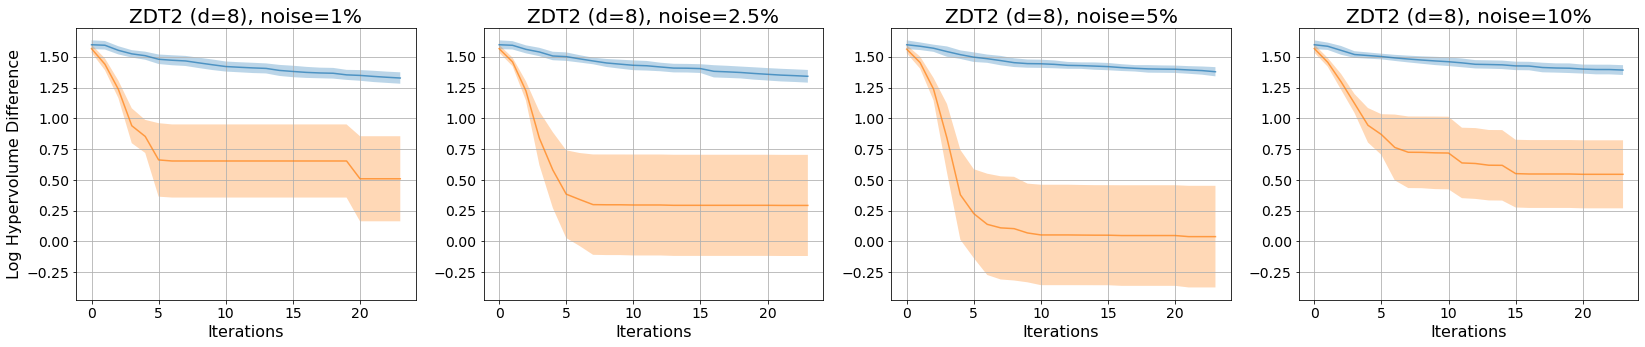

In [25]:
nsga3list = [hv_nsga3_plot_ZDT2_0,hv_nsga3_plot_ZDT2_1,hv_nsga3_plot_ZDT2_2,hv_nsga3_plot_ZDT2_3]
qnehvilist = [hv_qnehvi_plot_ZDT2_0, hv_qnehvi_plot_ZDT2_1, hv_qnehvi_plot_ZDT2_2, hv_qnehvi_plot_ZDT2_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"ZDT2 (d=8), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[2].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')

[-0.8227004002756494,
 -0.263469289109405,
 -0.8227004002756494,
 -0.263469289109405,
 -0.8227004002756494,
 -0.263469289109405,
 -0.8227004002756494,
 -0.263469289109405]

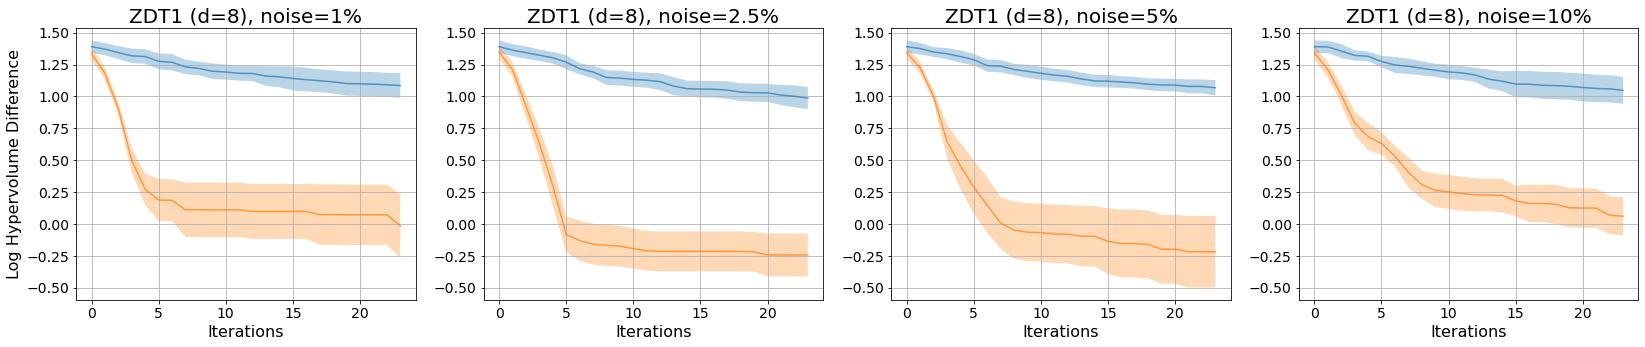

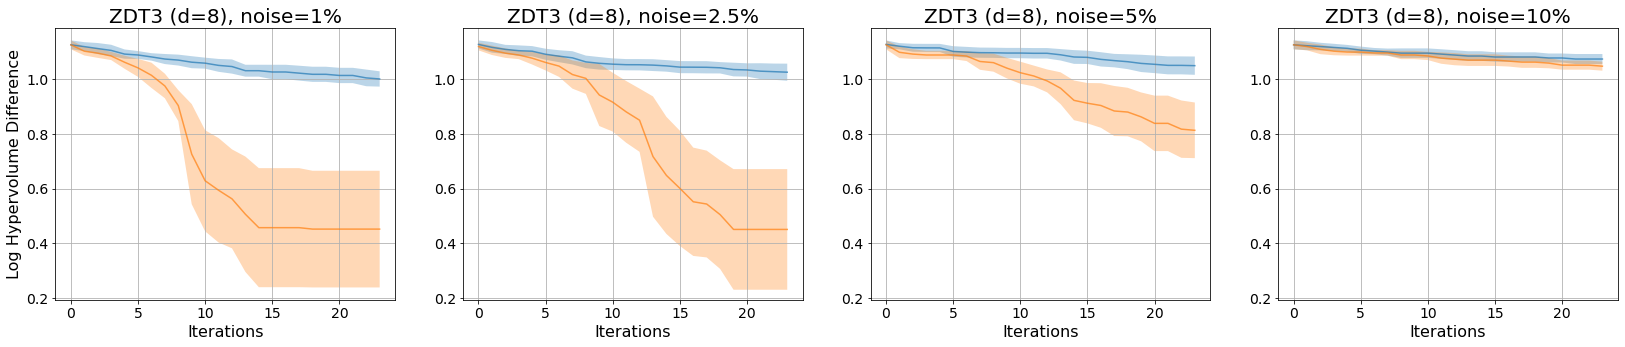

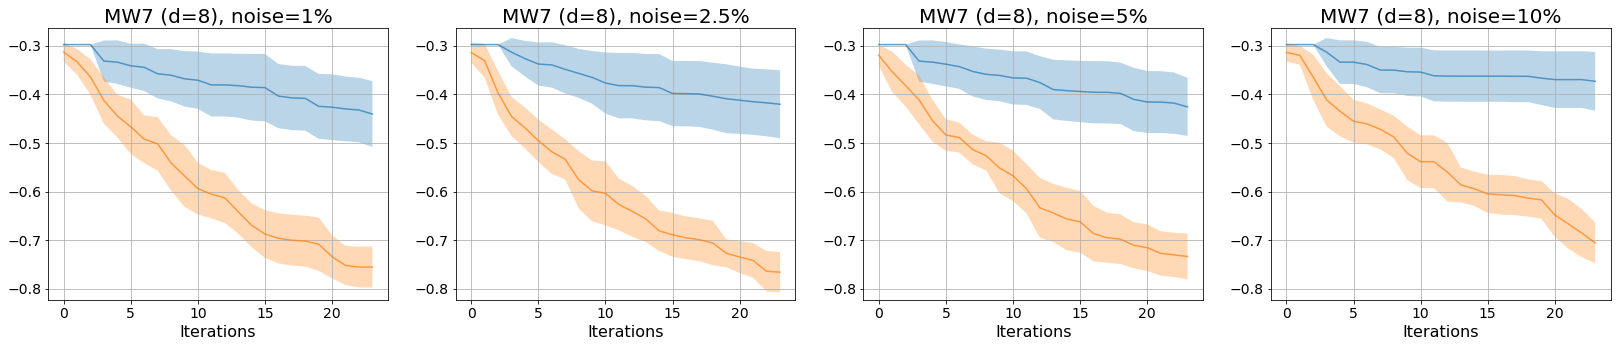

In [33]:
noiselist = [1, 2.5, 5, 10]
nsga3list = [hv_nsga3_plot_ZDT1_0,hv_nsga3_plot_ZDT1_1,hv_nsga3_plot_ZDT1_2,hv_nsga3_plot_ZDT1_3]
qnehvilist = [hv_qnehvi_plot_ZDT1_0, hv_qnehvi_plot_ZDT1_1, hv_qnehvi_plot_ZDT1_2, hv_qnehvi_plot_ZDT1_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"ZDT1 (d=8), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[2].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')

nsga3list = [hv_nsga3_plot_ZDT3_0,hv_nsga3_plot_ZDT3_1,hv_nsga3_plot_ZDT3_2,hv_nsga3_plot_ZDT3_3]
qnehvilist = [hv_qnehvi_plot_ZDT3_0, hv_qnehvi_plot_ZDT3_1, hv_qnehvi_plot_ZDT3_2, hv_qnehvi_plot_ZDT3_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"ZDT3 (d=8), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[0].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')

nsga3list = [hv_nsga3_plot_MW7_0,hv_nsga3_plot_MW7_1,hv_nsga3_plot_MW7_2,hv_nsga3_plot_MW7_3]
qnehvilist = [hv_qnehvi_plot_MW7_0, hv_qnehvi_plot_MW7_1, hv_qnehvi_plot_MW7_2, hv_qnehvi_plot_MW7_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"MW7 (d=8), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[0].get_ylim())
#ax[0].set(ylabel='Log Hypervolume Difference')
#plt.legend(bbox_to_anchor=(-1.25,-0.4), loc="lower center", ncol=2, fontsize=22)

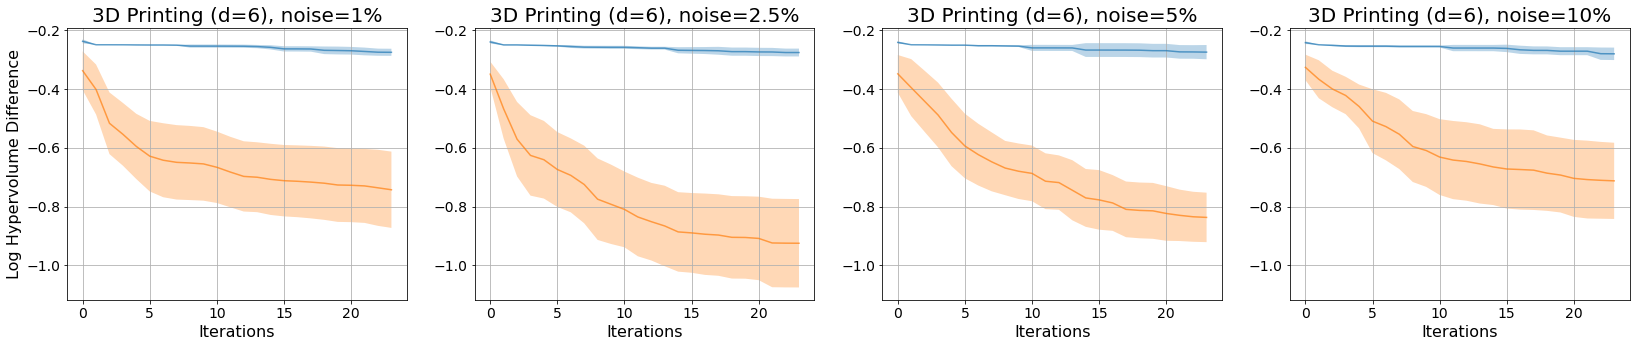

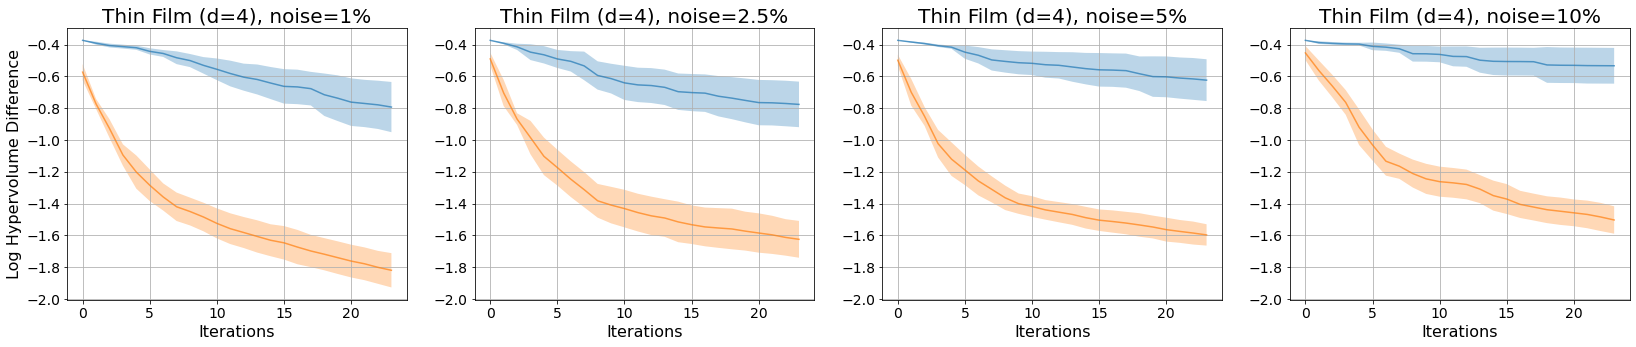

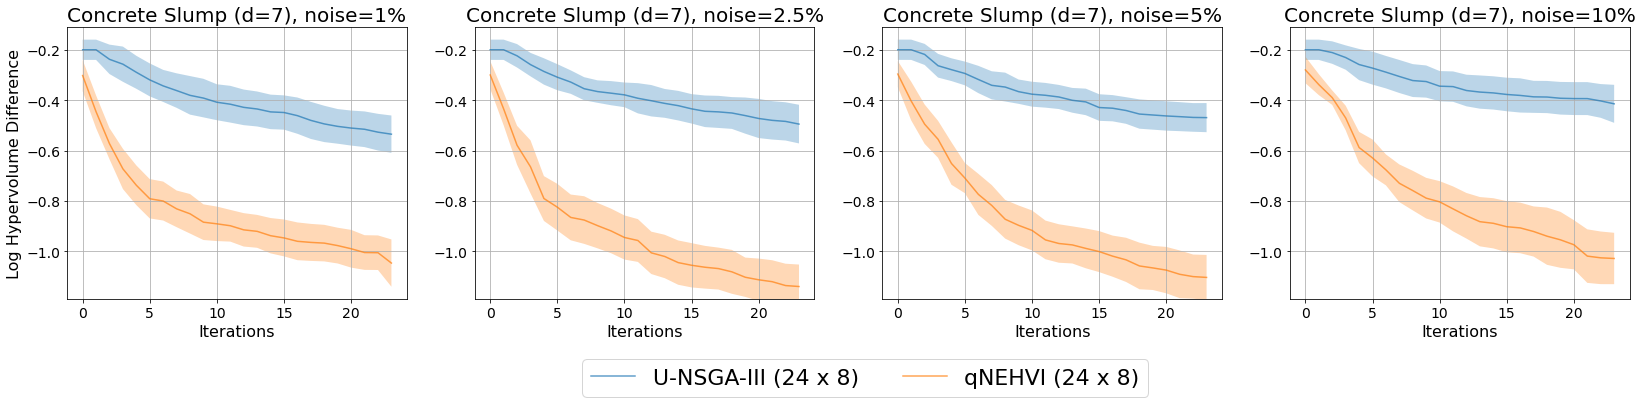

In [12]:
noiselist = [1, 2.5, 5, 10]
nsga3list = [hv_nsga3_plot_3d_0,hv_nsga3_plot_3d_1,hv_nsga3_plot_3d_2,hv_nsga3_plot_3d_3]
qnehvilist = [hv_qnehvi_plot_3d_0, hv_qnehvi_plot_3d_1, hv_qnehvi_plot_3d_2, hv_qnehvi_plot_3d_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"3D Printing (d=6), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[1].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')

nsga3list = [hv_nsga3_plot_thinfilm_0,hv_nsga3_plot_thinfilm_1,hv_nsga3_plot_thinfilm_2,hv_nsga3_plot_thinfilm_3]
qnehvilist = [hv_qnehvi_plot_thinfilm_0, hv_qnehvi_plot_thinfilm_1, hv_qnehvi_plot_thinfilm_2, hv_qnehvi_plot_thinfilm_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"Thin Film (d=4), noise={noise}%", fontsize=20)
    
plt.setp(ax, ylim=ax[0].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')

nsga3list = [hv_nsga3_plot_concrete_0,hv_nsga3_plot_concrete_1,hv_nsga3_plot_concrete_2,hv_nsga3_plot_concrete_3]
qnehvilist = [hv_qnehvi_plot_concrete_0, hv_qnehvi_plot_concrete_1, hv_qnehvi_plot_concrete_2, hv_qnehvi_plot_concrete_3]

fig, ax = plt.subplots(1, 4, figsize=(28, 5))

for i, noise, hv_nsga3, hv_qnehvi in zip(range(len(noiselist)), noiselist, nsga3list, qnehvilist):
        
    ax[i].plot(np.arange(24),
            hv_nsga3.mean(axis=0),
            label=f'U-NSGA-III (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_nsga3.mean(axis=0)-ci(hv_nsga3, 10), hv_nsga3.mean(axis=0)+ci(hv_nsga3, 10),
                    alpha=0.3) 

    ax[i].plot(np.arange(24),
            hv_qnehvi.mean(axis=0),
            label=f'qNEHVI (24 x 8)', linewidth=1.5, alpha=0.7)

    ax[i].fill_between(np.arange(24),
                    hv_qnehvi.mean(axis=0)-ci(hv_qnehvi, 10), hv_qnehvi.mean(axis=0)+ci(hv_qnehvi, 10),
                    alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"Concrete Slump (d=7), noise={noise}%", fontsize=20)

plt.setp(ax, ylim=ax[0].get_ylim())
ax[0].set(ylabel='Log Hypervolume Difference')
    
plt.legend(bbox_to_anchor=(-1.25,-0.4), loc="lower center", ncol=2, fontsize=22)